In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None #allows writing upon temporary DFs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read in the kaggle file 
kgldf = pd.read_csv("all_weekly_excess_deaths.csv")

In [8]:
# keep only the (potentially) relevant info
kgl= kgldf[['country', 'start_date', 'end_date', 'week', 'population', 'excess_deaths', 'excess_deaths_per_100k']]


In [4]:
# check date data type

print(kgl.dtypes)

country                    object
start_date                 object
end_date                   object
week                        int64
population                  int64
excess_deaths             float64
excess_deaths_per_100k    float64
dtype: object


In [9]:
kgl.head()

,country,start_date,end_date,week,population,excess_deaths,excess_deaths_per_100k
0,Australia,2019-12-30,2020-01-05,1,25921089,-39.372893,-0.151895
1,Australia,2020-01-06,2020-01-12,2,25921089,-54.539560,-0.210406
2,Australia,2020-01-13,2020-01-19,3,25921089,-18.039560,-0.069594
3,Australia,2020-01-20,2020-01-26,4,25921089,66.627107,0.257038
4,Australia,2020-01-27,2020-02-02,5,25921089,9.960440,0.038426


In [5]:
# create new variable that has dates in python's date format
kgl['newstartdate']=pd.to_datetime(kgl['start_date'].copy())

In [6]:
print(kgl.dtypes)

country                           object
start_date                        object
end_date                          object
week                               int64
population                         int64
excess_deaths                    float64
excess_deaths_per_100k           float64
newstartdate              datetime64[ns]
dtype: object


In [10]:
# do the same for the end dates
kgl['newenddate']=pd.to_datetime(kgl['end_date'])

In [12]:
# to estimate the period of the final combined dataset, we decided the common start and end dates for countries between datasets 
# we start with identifying the latest date a country begins to provide data 
lateststartdatekgl= kgl.groupby('country')['newstartdate'].min()

In [13]:
#we see that the latest starting date is Dec 2019
lateststartdatekgl.unique()

array(['2019-12-30T00:00:00.000000000', '2019-12-28T00:00:00.000000000',
       '2019-12-29T00:00:00.000000000'], dtype='datetime64[ns]')

In [14]:
# carry out the same process for the end date: these are the earliest dates a country ends their data output
# we identify the earliest date a country ends their data output
earliestenddatekgl= kgl.groupby('country')['newenddate'].max()

In [15]:
# change the groupby output to DF format to allow other commands to work on it
earliestenddatekgl.to_frame()

,newenddate
country,
Australia,2022-03-27
Austria,2022-07-03
Belgium,2022-06-19
Britain,2022-07-01
Bulgaria,2022-06-05
Canada,2022-02-26
Chile,2022-07-10
Colombia,2022-07-10
Croatia,2022-06-05


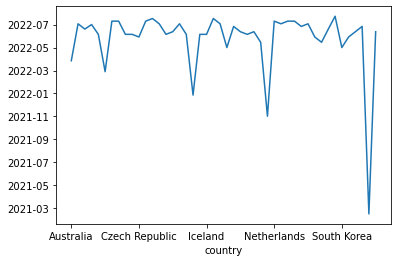

In [16]:
#this shows that most countries end their data in July 2022
earliestenddatekgl.plot()

In [17]:
earliestenddatekgl.unique()

array(['2022-03-27T00:00:00.000000000', '2022-07-03T00:00:00.000000000',
       '2022-06-19T00:00:00.000000000', '2022-07-01T00:00:00.000000000',
       '2022-06-05T00:00:00.000000000', '2022-02-26T00:00:00.000000000',
       '2022-07-10T00:00:00.000000000', '2022-05-29T00:00:00.000000000',
       '2022-07-17T00:00:00.000000000', '2022-06-12T00:00:00.000000000',
       '2021-12-26T00:00:00.000000000', '2022-05-01T00:00:00.000000000',
       '2022-06-26T00:00:00.000000000', '2022-05-15T00:00:00.000000000',
       '2021-10-31T00:00:00.000000000', '2022-07-23T00:00:00.000000000',
       '2021-02-14T00:00:00.000000000'], dtype='datetime64[ns]')

In [136]:
#change 'newstartdate' to 'newdate' to allow merge on this variable with the OWID dataset
kgl.rename(columns={'newstartdate':'newdate'}, inplace=True)

In [141]:
#drop unnecessary columns
kgl.drop(['start_date', 'end_date', 'week', 'population', 'newenddate'], axis=1, inplace=True)

In [18]:
#now we read in the 'our world in data (OWID)' file
owiddf = pd.read_csv("owid-covid-data.csv")

In [69]:
#select relevant columns & variables
owid= owiddf[['location', 'date', 'new_cases', 'population']]

In [70]:
#repeat the process performed with the kaggle dataset above
#make new date format date variable
owid['newdate']=pd.to_datetime(owid['date'])

In [71]:
print(owid.dtypes)

location              object
date                  object
new_cases            float64
population           float64
newdate       datetime64[ns]
dtype: object


In [109]:
owid['incidence']=owid['new_cases']/owid['population']*100000

In [113]:
owid

,country,date,new_cases,population,newdate,incidence
0,Afghanistan,2020-02-24,5.0,41128772.0,2020-02-24,0.012157
1,Afghanistan,2020-02-25,0.0,41128772.0,2020-02-25,0.000000
2,Afghanistan,2020-02-26,0.0,41128772.0,2020-02-26,0.000000
3,Afghanistan,2020-02-27,0.0,41128772.0,2020-02-27,0.000000
4,Afghanistan,2020-02-28,0.0,41128772.0,2020-02-28,0.000000
...,...,...,...,...,...,...
252273,Zimbabwe,2023-01-19,0.0,16320539.0,2023-01-19,0.000000
252274,Zimbabwe,2023-01-20,0.0,16320539.0,2023-01-20,0.000000
252275,Zimbabwe,2023-01-21,0.0,16320539.0,2023-01-21,0.000000
252276,Zimbabwe,2023-01-22,0.0,16320539.0,2023-01-22,0.000000


In [114]:
#change the country info to the same name as the kaggle data
owid.rename(columns={'location':'country'}, inplace=True)

In [118]:
#get latest 'start of data' date for each country
lateststartdateowid= owid.groupby('country')['newdate'].min()

In [119]:
#change output to DF format
lateststartdateowid= lateststartdateowid.to_frame()

In [120]:
#this is later than the kaggle start date, so we use data from 1/3/2020
lateststartdateowid.describe()

,newdate
count,248
unique,92
top,2020-03-14 00:00:00
freq,13
first,2020-01-01 00:00:00
last,2022-04-20 00:00:00


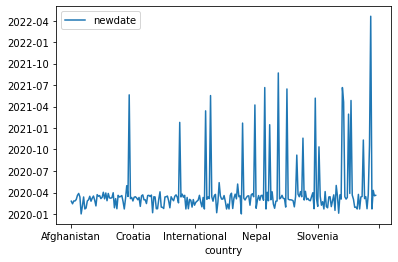

In [121]:
#visual representation showing the spread of data
lateststartdateowid.plot()

In [122]:
#get earliest 'final data date' of each country
earliestenddateowid= owid.groupby('country')['newdate'].max()

In [123]:
earliestenddateowid.to_frame()

,newdate
country,
Afghanistan,2023-01-23
Africa,2023-01-23
Albania,2023-01-23
Algeria,2023-01-23
Andorra,2023-01-23
...,...
Western Sahara,2022-04-20
World,2023-01-23
Yemen,2023-01-23


In [124]:
earliestenddateowid.describe()

count                     248
unique                     15
top       2023-01-23 00:00:00
freq                      232
first     2021-12-04 00:00:00
last      2023-01-23 00:00:00
Name: newdate, dtype: object

9

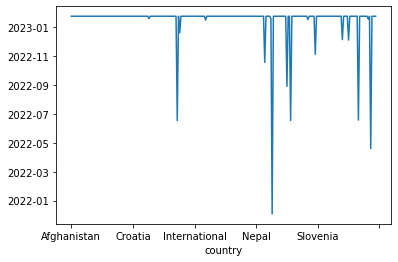

In [125]:
#this is later than the kaggle data, so we use 31/7/2022 as the last date
earliestenddateowid.plot()


In [132]:
owidweekly= owid

In [133]:
print(owid.dtypes)

country               object
date                  object
new_cases            float64
population           float64
newdate       datetime64[ns]
incidence            float64
dtype: object


In [134]:
owidweekly= owid.groupby('country')['newdate', 'new_cases', 'incidence',].resample('W-Mon', label='right', closed='right', on='newdate').sum().reset_index()

C:\Users\akbab_000\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [135]:
owidweekly

,country,newdate,new_cases,incidence
0,Afghanistan,2020-02-24,5.0,0.012157
1,Afghanistan,2020-03-02,0.0,0.000000
2,Afghanistan,2020-03-09,3.0,0.007294
3,Afghanistan,2020-03-16,17.0,0.041334
4,Afghanistan,2020-03-23,17.0,0.041334
...,...,...,...,...
36166,Zimbabwe,2022-12-26,625.0,3.829530
36167,Zimbabwe,2023-01-02,0.0,0.000000
36168,Zimbabwe,2023-01-09,0.0,0.000000
36169,Zimbabwe,2023-01-16,0.0,0.000000


In [145]:
#merge on country and dates that fall between 1/3/20 and 31/7/22
mergeddf= owidweekly.merge(kgl, on=['country', 'newdate'])

In [146]:
mergeddf

,country,newdate,new_cases,incidence,excess_deaths,excess_deaths_per_100k
0,Australia,2020-01-27,5.0,0.019100,9.960440,0.038426
1,Australia,2020-02-03,7.0,0.026741,-14.706227,-0.056735
2,Australia,2020-02-10,3.0,0.011460,93.627107,0.361201
3,Australia,2020-02-17,0.0,0.000000,69.960440,0.269898
4,Australia,2020-02-24,0.0,0.000000,137.352528,0.529887
...,...,...,...,...,...,...
4953,United States,2022-05-09,544134.0,160.848453,2353.085593,0.698250
4954,United States,2022-05-16,652672.0,192.932773,2564.685593,0.761040
4955,United States,2022-05-23,764008.0,225.844194,2108.485593,0.625668
4956,United States,2022-05-30,621708.0,183.779676,3085.285593,0.915521
